# Import packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
from uncvalue import *

from matplotlib import rc

plt.rcParams.update({'font.size': 16})

rc('text', usetex=True)

# Read data 

In [2]:
data = pd.read_csv("data.csv")

data

,Distance,Unc_dist,T1,Unc_T1,T2,Unc_T2,T3,Unc_T3
0,10,0.1,116.6,0.1,98.0,0.1,79.0,0.1
1,20,0.1,92.8,0.1,74.7,0.1,54.0,0.1
2,30,0.1,73.6,0.1,57.1,0.1,40.3,0.1
3,40,0.1,59.4,0.1,47.3,0.1,33.2,0.1
4,50,0.1,49.5,0.1,39.3,0.1,29.6,0.1
5,60,0.1,42.7,0.1,34.2,0.1,27.7,0.1
6,70,0.1,38.2,0.1,31.1,0.1,26.9,0.1
7,80,0.1,35.0,0.1,29.3,0.1,26.5,0.1
8,90,0.1,33.1,0.1,28.2,0.1,26.4,0.1
9,100,0.1,31.8,0.1,27.6,0.1,26.2,0.1


In [3]:
Ta = Value(24.0, 0.1) #Environmental temperature

d1 = Value(3.2, 0.01) / 100 #Aluminium bar diameter in meters
d2 = Value(3.0, 0.01) / 100 #Laton bar diameter in meters
d3 = Value(3.0, 0.01) / 100 #Iron bar diameter in meters

r1 = d1 / 2 #Aluminium bar radius in meters
r2 = d2 / 2 #Laton bar radius in meters
r3 = d3 / 2 #Iron bar radius in meters

# Process data 

In [4]:
distances = set_unc(data["Distance"].values, data["Unc_dist"].values)

T1 = set_unc(data["T1"].values, data["Unc_T1"].values)
T2 = set_unc(data["T2"].values, data["Unc_T2"].values)
T3 = set_unc(data["T3"].values, data["Unc_T3"].values)

# Plot processed data with errors using val and unc functions 

<ErrorbarContainer object of 3 artists>

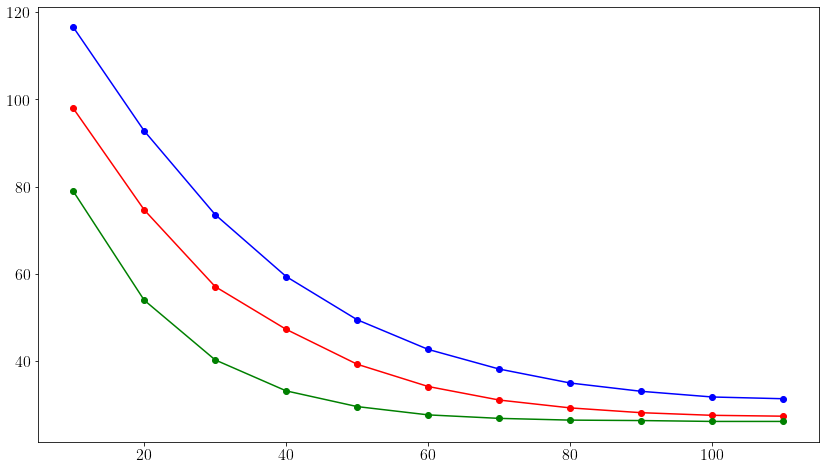

In [5]:
plt.figure(figsize=(14, 8))

plt.errorbar(val(distances), val(T1), yerr=unc(T1), ls='-', marker='o', color='b')
plt.errorbar(val(distances), val(T2), yerr=unc(T2), ls='-', marker='o', color='r')
plt.errorbar(val(distances), val(T3), yerr=unc(T3), ls='-', marker='o', color='g')

In fact errors are too small to be appreciated. 

# Implement $\ln{\theta_x}=-px+\ln{\theta_0}$ where $\theta_x=T_x-T_a$ 

In [6]:
Theta1_x = T1 - Ta

Theta2_x = T2 - Ta

Theta3_x = T3 - Ta

In [7]:
ln_theta1_x = np.log(Theta1_x)

ln_theta2_x = np.log(Theta2_x)

ln_theta3_x = np.log(Theta3_x);

<ErrorbarContainer object of 3 artists>

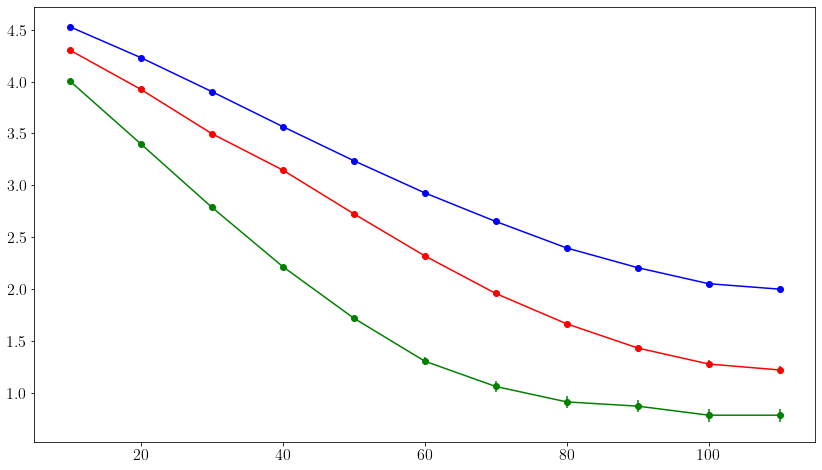

In [8]:
plt.figure(figsize=(14, 8))

plt.errorbar(val(distances), val(ln_theta1_x), yerr=unc(ln_theta1_x), ls='-', marker='o', color='b')
plt.errorbar(val(distances), val(ln_theta2_x), yerr=unc(ln_theta2_x), ls='-', marker='o', color='r')
plt.errorbar(val(distances), val(ln_theta3_x), yerr=unc(ln_theta3_x), ls='-', marker='o', color='g')

# Perform linear regression 
 

## T1 

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(val(distances), val(ln_theta1_x))

p1 = Value(slope, std_err)
theta0_1 = intercept

print("p: ", p1)

p:  (-26.7 ± 1.3)·10^-3


## T2 

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(val(distances), val(ln_theta2_x))

p2 = Value(slope, std_err)
theta0_2 = intercept

print("p: ", p2)

p:  (-32.6 ± 1.8)·10^-3


## T3 

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(val(distances), val(ln_theta3_x))

p3 = Value(slope, std_err)
theta0_3 = intercept

print("p: ", p3)

p:  (-32.3 ± 4.0)·10^-3


# Plot 

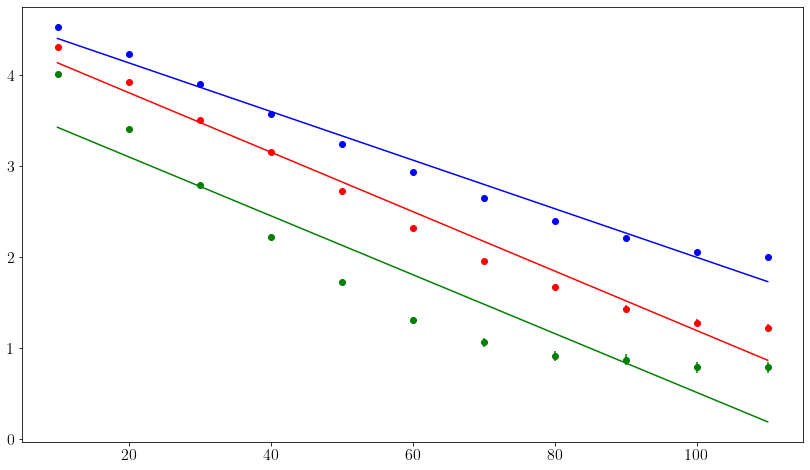

In [12]:
plt.figure(figsize=(14, 8))

plt.errorbar(val(distances), val(ln_theta1_x), yerr=unc(ln_theta1_x), ls='', marker='o', color='b')
plt.errorbar(val(distances), val(ln_theta2_x), yerr=unc(ln_theta2_x), ls='', marker='o', color='r')
plt.errorbar(val(distances), val(ln_theta3_x), yerr=unc(ln_theta3_x), ls='', marker='o', color='g')

plt.plot(val(distances), val(theta0_1) + val(distances)*val(p1), color='b')
plt.plot(val(distances), val(theta0_2) + val(distances)*val(p2), color='r')
plt.plot(val(distances), val(theta0_3) + val(distances)*val(p3), color='g')

# Compute conductivities  

The conductivities for the three rods accomplish the following relation

$$
p_1^2K_1r_1=p_2^2K_2r_2=p_3^2K_3r_3
$$

using the theoretical value of the iron conductivity, $K_3=79.5 \ \mathrm{W}\cdot\mathrm{m}^{-1}\cdot\mathrm{K}^{-1}$, the values for the aluminium and laton conductivities can be obtained.

## Convert slopes into meters 

In [13]:
p1 *= -100
p2 *= -100
p3 *= -100

#Change sign to get p

print(p1, " ", p2, " ", p3)

(26.7 ± 1.3)·10^-1   (32.6 ± 1.8)·10^-1   (32.3 ± 4.0)·10^-1


In [14]:
K_3 = 79.5

In [15]:
K_1 = K_3 * r3 * p3**2 / (p1**2 * r1)

K_2 = K_3 * r3 * p3**2 / (p2**2 * r2)

print("Aluminium conductivity: ", K_1)
print("Laton conductivity: ", K_2)

Aluminium conductivity:  (10.9 ± 2.9)·10^1
Laton conductivity:  (7.8 ± 2.1)·10^1


# Improve results 

In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(val(distances[0:6]), val(ln_theta1_x[0:6]))

p1 = Value(slope, std_err)
theta0_1 = intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(val(distances[0:6]), val(ln_theta2_x[0:6]))

p2 = Value(slope, std_err)
theta0_2 = intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(val(distances[0:6]), val(ln_theta3_x[0:6]))

p3 = Value(slope, std_err)
theta0_3 = intercept

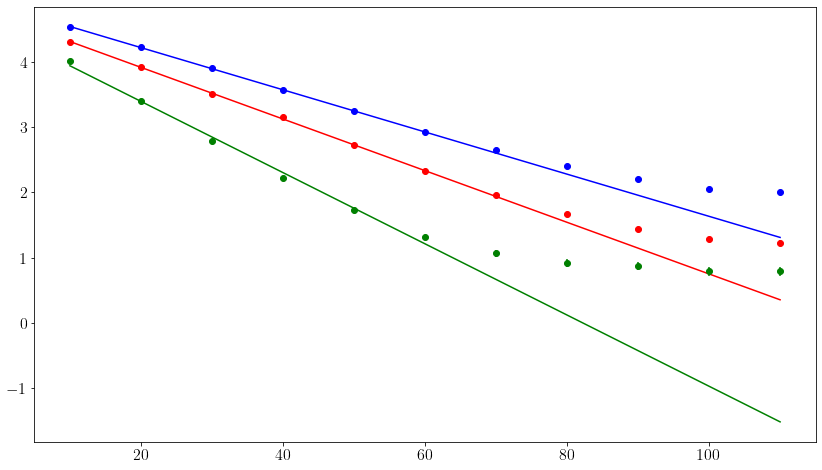

In [17]:
plt.figure(figsize=(14, 8))

plt.errorbar(val(distances), val(ln_theta1_x), yerr=unc(ln_theta1_x), ls='', marker='o', color='b')
plt.errorbar(val(distances), val(ln_theta2_x), yerr=unc(ln_theta2_x), ls='', marker='o', color='r')
plt.errorbar(val(distances), val(ln_theta3_x), yerr=unc(ln_theta3_x), ls='', marker='o', color='g')

plt.plot(val(distances), val(theta0_1) + val(distances)*val(p1), color='b')
plt.plot(val(distances), val(theta0_2) + val(distances)*val(p2), color='r')
plt.plot(val(distances), val(theta0_3) + val(distances)*val(p3), color='g')

In [18]:
p1 *= -100
p2 *= -100
p3 *= -100

K_3 = 79.5

K_1 = K_3 * r3 * p3**2 / (p1**2 * r1)

K_2 = K_3 * r3 * p3**2 / (p2**2 * r2)

print("Aluminium conductivity: ", K_1)
print("Laton conductivity: ", K_2)

Aluminium conductivity:  (21.2 ± 1.5)·10^1
Laton conductivity:  (15.1 ± 1.1)·10^1
